## Credit Card Customer Segmentation
- This case requires developing a customer segmentation to define marketing strategy
- Unsupervised Learning - There is no target variable

#### Tasks
- Prepare intelligent KPI's
- Provide detailed insights based on the analysis
- Cluster Analysis
- Provide strategic insights

### Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#%matplotlib inline ensures that the plots are embedded directly within the notebook output cells, allowing you to see the results immediately below the code cell that generates them.

- Load Dataset

In [2]:
df = pd.read_csv("./../datasets/Credit_Clustering.csv")

In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## Exploratory Data Analysis

In [4]:
### data dimensions

df.shape

(8950, 18)

In [5]:
## Data Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Meaning of Every Column

1. CUST_ID:

This is a unique identifier for each customer. It's useful for tracking individual customers, but is not typically used in modeling since it's an ID and not a feature that affects behavior.

2. BALANCE:

The current balance on the customer's credit card. This is a measure of how much the customer owes or how much credit is available to them. It can be used to understand the customer's financial health and spending patterns.

3. BALANCE_FREQUENCY:

This is the frequency of balance updates for the customer, represented as a ratio. A value of 1 means the balance has been updated regularly (e.g., every month), while lower values may indicate less frequent balance updates. It helps assess the regularity with which a customer uses or interacts with their credit.

4. PURCHASES:

Total amount of money spent on purchases using the credit card. This variable can give insights into the customer's overall spending behavior on their credit card.

5. ONEOFF_PURCHASES:

The total amount spent on one-off purchases. These are typically larger, less frequent purchases as opposed to small recurring ones. This variable helps understand how much the customer spends in large chunks rather than daily or weekly transactions.

6. INSTALLMENTS_PURCHASES:

The total amount spent on purchases that are paid for in installments. It tells you how much the customer is using installment plans for their purchases. High installment purchases can indicate financial planning or dependency on credit.

7. CASH_ADVANCE:

The total amount of cash the customer has withdrawn through the credit card. Cash advances often come with higher fees and interest rates, so this can indicate how much a customer relies on the credit card for liquid cash.

8. PURCHASES_FREQUENCY:

The frequency with which the customer makes purchases on the credit card, expressed as a ratio. A higher value indicates that the customer makes purchases more frequently, which could suggest active usage of the card.
9. ONEOFF_PURCHASES_FREQUENCY:

The frequency at which one-off purchases occur, expressed as a ratio. It helps identify how often a customer makes large, one-time purchases.

10. PURCHASES_INSTALLMENTS_FREQUENCY:

The frequency at which installment purchases occur, expressed as a ratio. Higher values suggest that the customer frequently opts for installment payments.

11. CASH_ADVANCE_FREQUENCY:

The frequency at which cash advances are taken, expressed as a ratio. Higher values indicate that the customer frequently uses the credit card for cash advances, which may reflect a dependence on credit for short-term liquidity.

12. CASH_ADVANCE_TRX:

The number of transactions in which the customer withdrew cash through their credit card. It’s a direct indicator of how often the customer is using their credit card to get cash.

13. PURCHASES_TRX:

The number of transactions made using the credit card for purchases. This variable indicates the number of times the customer has used the card for buying products/services.

14. CREDIT_LIMIT:

The maximum credit limit available to the customer. This is an important indicator of the customer's purchasing power and financial trustworthiness, as set by the credit card company.

15. PAYMENTS:

The total amount paid by the customer toward their credit card balance. A higher payment value can indicate good repayment behavior and financial health.

16. MINIMUM_PAYMENTS:

The minimum payment required to be made by the customer on their credit card balance. This is often calculated as a percentage of the total outstanding balance, and could reflect the minimum amount a customer can afford to repay.

17. PRC_FULL_PAYMENT:

The percentage of the balance that the customer has fully paid. A value of 1 means the customer pays off the entire balance, while lower values could suggest that the customer is only paying part of the balance (leading to potential debt accumulation).

18. TENURE:

The number of months the customer has been with the credit card company. This can help determine customer loyalty and their long-term relationship with the financial institution.


Summary:
The dataset primarily tracks credit card usage behavior and the customer’s ability to manage their balance. Variables related to purchases, payments, cash advances, and credit usage frequency can provide insights into customer financial behavior and risk. This dataset can be used for various types of analysis, such as customer segmentation, churn prediction, or default risk modeling. Each variable serves as a feature that helps understand customer spending habits, financial stability, and interaction with their credit cards.

In [6]:
### Checking for Missing Values

df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

- There are some missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS

In [7]:
##Checking the missing value count for CREDIT LIMIT

df['CREDIT_LIMIT'].isnull().value_counts()

CREDIT_LIMIT
False    8949
True        1
Name: count, dtype: int64

In [8]:
##Checking missing value count for MINIMUM PAYMENTS

df['MINIMUM_PAYMENTS'].isnull().value_counts()

MINIMUM_PAYMENTS
False    8637
True      313
Name: count, dtype: int64

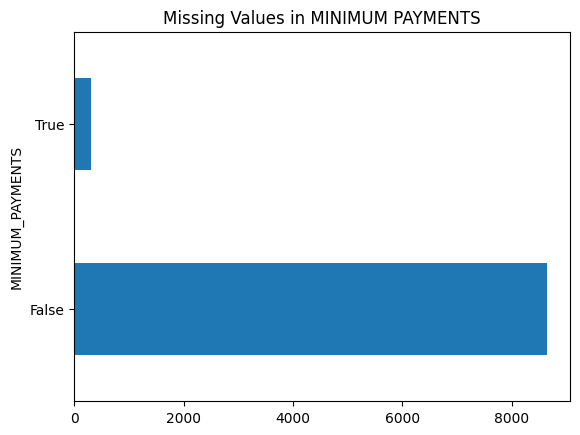

In [9]:
df['MINIMUM_PAYMENTS'].isnull().value_counts().plot.barh()

plt.title("Missing Values in MINIMUM PAYMENTS")
plt.show()

- Descriptive Analysis of data

In [10]:
print(df["MINIMUM_PAYMENTS"].describe())

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64


In [11]:
## Intital descriptive analysis of the data

df.describe(percentiles=[.25,0.50,0.75,0.90]).T

,count,mean,std,min,25%,50%,75%,90%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,4338.563657,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,2542.624000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,1600.099000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,1140.070000,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,3065.534560,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,0.750000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,0.416667,1.50000


### Missing Value Treatment

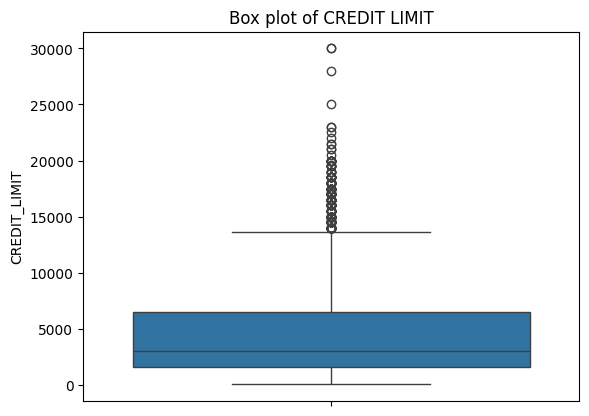

In [12]:
##Checking the distribution of 'CREDIT LIMIT'

sns.boxplot(y = "CREDIT_LIMIT", data=df)
plt.title("Box plot of CREDIT LIMIT")

plt.show()

- From the boxplot we have seen the data is skewed, so we will use median to impute the missing data

In [13]:
#Impute with median
#if the data is skewed we use median instead of mean
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace = True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24964\3310688135.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace = True)


In [14]:
#Rechecking whether imputing sucessfull or not
df['CREDIT_LIMIT'].isnull().sum()

0

The box plot is useful for detecting if the data is skewed:
If the median is closer to the lower or upper quartile, the data may be skewed.
If there are a lot of outliers, the data could be indicating high variance or unusual values.
This visualization helps in quickly assessing the spread, symmetry, and outliers in the MINIMUM_PAYMENTS column, aiding in understanding the dataset better before performing any further analysis.

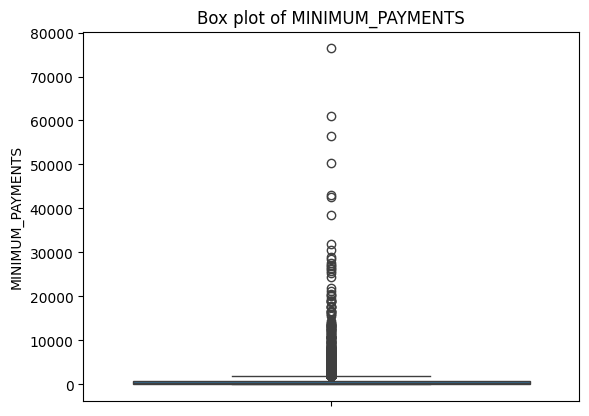

In [15]:
##Checking the distribution of 'MINIMUM_PAYMENTS'

sns.boxplot(y = "MINIMUM_PAYMENTS", data=df)
plt.title("Box plot of MINIMUM_PAYMENTS") #to check is the data skewed

plt.show()

- From the boxplot we have seen the data is skewed, so we will use median to impute the missing data

In [16]:
#Impute with median

df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace = True)  #inplace=true means directly in orginal

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24964\1787800513.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace = True)  #inplace=true means directly in orginal


In [17]:
#Rechecking whether imputing sucessfull or not
df['MINIMUM_PAYMENTS'].isnull().sum()

0

**Observations**
- There are 8950 observations and 18 features
- 18 Numerical columns
- There are missing values in 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS'
- Data is skewed in CREDIT_LIMIT and MINIMUM_PAYMENTS
- We have used median to impute the missing value data

----

## Deriving New KPI

---
(Key Performance Indicator)

#### Monthly Average Purchase

In [18]:
df["Monthly_Avg_Purchase"] = df["PURCHASES"]/df["TENURE"]

In [19]:
df["Monthly_Avg_Purchase"].head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: Monthly_Avg_Purchase, dtype: float64

#### Monthly cash advance amount

In [20]:
df["Monthly_Cash_Advance"] = df["CASH_ADVANCE"]/df["TENURE"]

### Purchase Type

This helps compare how customers split their spending between one-time purchases and installment payments.

In [21]:
df.loc[:,["ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES"]].head()

,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,0.00,95.4
1,0.00,0.0
2,773.17,0.0
3,1499.00,0.0
4,16.00,0.0


- Deriving the categorical variable based on user behaviour

In [22]:
def purchasetype(x):    
    if (x["ONEOFF_PURCHASES"] == 0) & (x["INSTALLMENTS_PURCHASES"] == 0):
        return("NONE")
    elif (x["ONEOFF_PURCHASES"] > 0) & (x["INSTALLMENTS_PURCHASES"] == 0):
        return("ONEOFF")
    elif (x["ONEOFF_PURCHASES"] == 0) & (x["INSTALLMENTS_PURCHASES"] > 0):
        return("INSTALLMENTS")
    elif (x["ONEOFF_PURCHASES"] > 0) & (x["INSTALLMENTS_PURCHASES"] > 0):
        return("BOTH_ONEOFF_INSTALLMENTS")

You created a function purchasetype that categorizes customers based on their purchasing behavior into 4 groups:

"NONE" - No purchases of either type
"ONEOFF" - Only one-time purchases
"INSTALLMENTS" - Only installment purchases
"BOTH_ONEOFF_INSTALLMENTS" - Mix of both purchase types

In [23]:
df["Purchase_Type"] = df.apply(purchasetype,axis=1)

In [24]:
df["Purchase_Type"].value_counts()

Purchase_Type
BOTH_ONEOFF_INSTALLMENTS    2774
INSTALLMENTS                2260
NONE                        2042
ONEOFF                      1874
Name: count, dtype: int64

### Limit usage

- Balance to credit limit ratio

In [25]:
df["Balance_Credit_Ratio"] = df["BALANCE"]/df["CREDIT_LIMIT"]

By dividing BALANCE by CREDIT_LIMIT, you're calculating how much of the customer's available credit they are using. This ratio is useful because it can provide insights into:

Credit Utilization: A higher ratio means the customer is using a larger proportion of their available credit, which could indicate higher financial stress or risk.
Credit Risk Assessment: Financial institutions often track this ratio to assess whether a customer is close to their credit limit. A high ratio could indicate a customer who might struggle to repay their debt or might be a higher credit risk.
Customer Behavior: Understanding how a customer uses their credit could be useful for marketing or targeting specific services (e.g., offering credit line increases to those who use most of their available credit but pay regularly).

In [26]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE',
       'Monthly_Avg_Purchase', 'Monthly_Cash_Advance', 'Purchase_Type',
       'Balance_Credit_Ratio'],
      dtype='object')

In [27]:
df.shape

(8950, 22)

In [28]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,INSTALLMENTS,0.040901
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,NONE,0.457495
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,ONEOFF,0.332687
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,7500.0,0.000000,312.343947,0.000000,12,124.916667,17.149001,ONEOFF,0.222223
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,ONEOFF,0.681429


### Payments to Minimum Payments Ratio
- Total Payment Ratio calculate it by dividing your total monthly credit payments by the total minimum due

In [29]:
#added where clause to avoid division by zero

df["Total_Payment_Ratio"] = np.where(df["MINIMUM_PAYMENTS"] == 0,df["MINIMUM_PAYMENTS"], df["PAYMENTS"]/df["MINIMUM_PAYMENTS"])

The Total Payment Ratio is calculated by dividing the PAYMENTS by the MINIMUM_PAYMENTS.

When the customer has made no minimum payment (MINIMUM_PAYMENTS == 0), the formula assigns a ratio of 0, implying that no payment has been made.
Otherwise, it calculates the ratio as PAYMENTS / MINIMUM_PAYMENTS, which gives the proportion of the minimum payment that has been made.

In [30]:
df = df.round(2)

In [31]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio,Total_Payment_Ratio
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,...,1000.0,201.80,139.51,0.00,12,7.95,0.00,INSTALLMENTS,0.04,1.45
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,...,7000.0,4103.03,1072.34,0.22,12,0.00,536.91,NONE,0.46,3.83
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,...,7500.0,622.07,627.28,0.00,12,64.43,0.00,ONEOFF,0.33,0.99
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,...,7500.0,0.00,312.34,0.00,12,124.92,17.15,ONEOFF,0.22,0.00
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,...,1200.0,678.33,244.79,0.00,12,1.33,0.00,ONEOFF,0.68,2.77


---

## Insights from new KPIs

---

In [32]:
#Average Total Payment Ratio  for each purchase type

x = df[["Purchase_Type","Total_Payment_Ratio"]].groupby(["Purchase_Type"]).agg("mean").reset_index()
x

,Purchase_Type,Total_Payment_Ratio
0,BOTH_ONEOFF_INSTALLMENTS,7.237087
1,INSTALLMENTS,13.259013
2,NONE,10.087311
3,ONEOFF,5.571051


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24964\2233224339.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("Purchase_Type").apply(lambda x: np.mean(x["Total_Payment_Ratio"])).plot.barh()


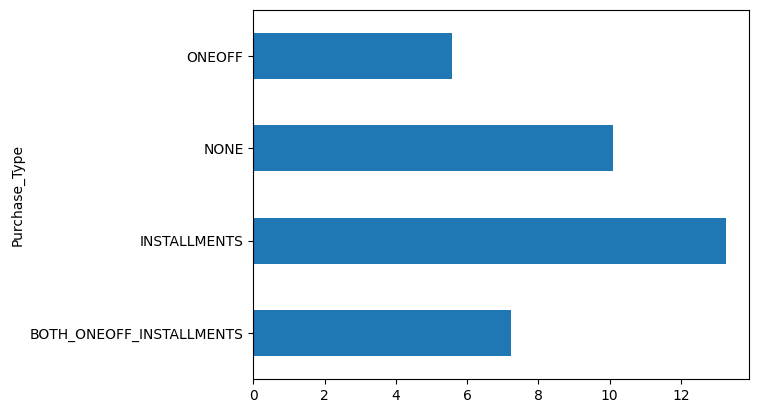

In [33]:
#checking the total payment ratio based on purchase type

df.groupby("Purchase_Type").apply(lambda x: np.mean(x["Total_Payment_Ratio"])).plot.barh()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24964\2623226163.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby('Purchase_Type').apply(lambda x : np.mean(x['Monthly_Cash_Advance'])).plot.barh()


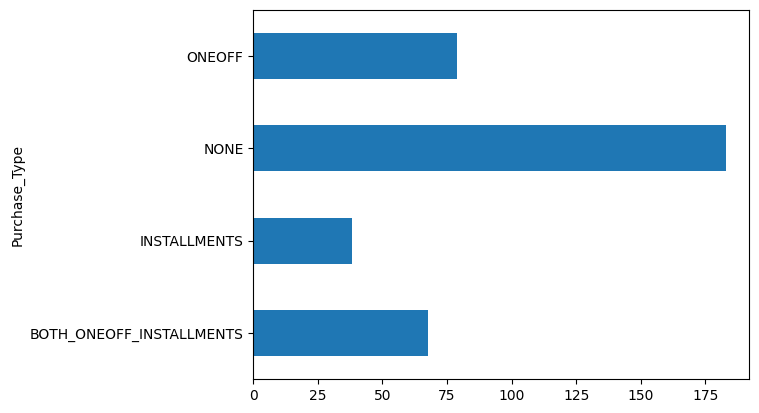

In [34]:
df.groupby('Purchase_Type').apply(lambda x : np.mean(x['Monthly_Cash_Advance'])).plot.barh()
plt.show()

#### Insights
- Customers with installment payments are paying dues
- Customers who do not do ONOFF or INSTALLMENTS take more cash advance
- Customers with installment purchases have good credit score

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24964\3097769551.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("Purchase_Type").apply(lambda x: np.mean(x["Balance_Credit_Ratio"])).plot.barh()


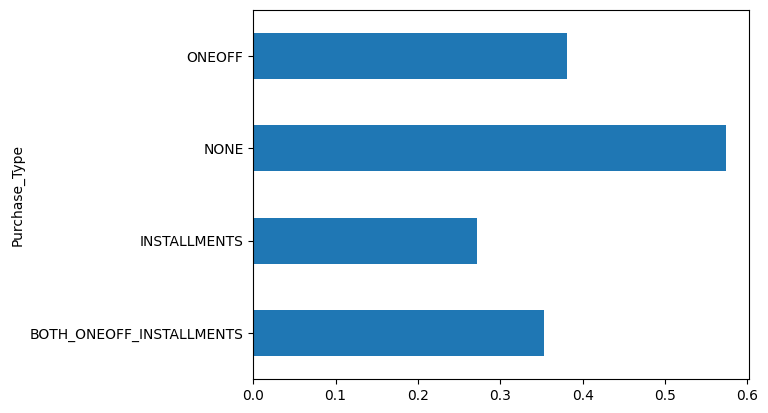

In [35]:
#balance to credit ratio (limit usage ratio) is more then the customers will have good credit score

df.groupby("Purchase_Type").apply(lambda x: np.mean(x["Balance_Credit_Ratio"])).plot.barh()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24964\2589890569.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df.groupby("Purchase_Type").apply(lambda x: np.mean(x["Monthly_Avg_Purchase"])).plot.barh()


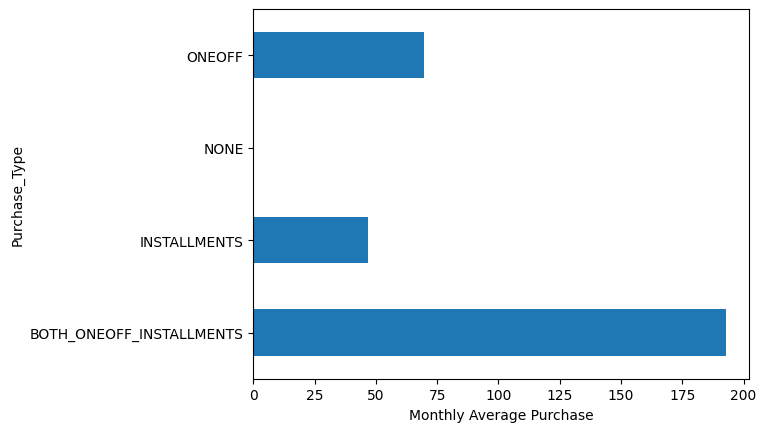

In [36]:
#checking the monthly average purchases based on payment type
df.groupby("Purchase_Type").apply(lambda x: np.mean(x["Monthly_Avg_Purchase"])).plot.barh()
plt.xlabel("Monthly Average Purchase")
plt.show()

Customers using both oneoff and installment payment has more monthly average purchases

### Data Segregation
- Handling Categorical Variable

In [37]:
#getting the numeric variable names and data
creditcarddata_numeric = df._get_numeric_data()

In [38]:
numeric_variable_names =  list(creditcarddata_numeric.columns)

In [39]:
numeric_variable_names

['BALANCE',
 'BALANCE_FREQUENCY',
 'PURCHASES',
 'ONEOFF_PURCHASES',
 'INSTALLMENTS_PURCHASES',
 'CASH_ADVANCE',
 'PURCHASES_FREQUENCY',
 'ONEOFF_PURCHASES_FREQUENCY',
 'PURCHASES_INSTALLMENTS_FREQUENCY',
 'CASH_ADVANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'PURCHASES_TRX',
 'CREDIT_LIMIT',
 'PAYMENTS',
 'MINIMUM_PAYMENTS',
 'PRC_FULL_PAYMENT',
 'TENURE',
 'Monthly_Avg_Purchase',
 'Monthly_Cash_Advance',
 'Balance_Credit_Ratio',
 'Total_Payment_Ratio']

There are many variables having extreme values, i am doing the log transformation on the dataset to remove the outlier effect

In [40]:
#log transformation

df_log = creditcarddata_numeric.apply(lambda x: np.log(x + 1))

In [41]:
df_log.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,Total_Payment_Ratio
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,...,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,6.161638,0.619992,4.899647,3.204274,3.352403,3.319086,0.361112,0.158423,0.270125,0.113286,...,1.894731,8.094825,6.624541,5.916079,0.117550,2.519680,3.050872,2.163969,0.296065,1.357595
std,2.013303,0.148856,2.916872,3.246365,3.082973,3.566298,0.277560,0.216834,0.281965,0.156823,...,1.373856,0.819629,1.591761,1.169927,0.211692,0.130367,2.002826,2.429742,0.250341,0.940158
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.931826,0.000000,0.019803,0.000000,1.945910,0.000000,0.000000,0.000000,0.000000
25%,4.861981,0.636577,3.704627,0.000000,0.000000,0.000000,0.076961,0.000000,0.000000,0.000000,...,0.693147,7.378384,5.951352,5.146666,0.000000,2.564949,1.481032,0.000000,0.039221,0.647103
50%,6.773521,0.693147,5.892417,3.663562,4.499810,0.000000,0.405465,0.076961,0.157004,0.000000,...,2.079442,8.006701,6.754488,5.747289,0.000000,2.564949,3.494536,0.000000,0.262364,1.108563
75%,7.628098,0.693147,7.013133,6.360274,6.151961,7.016450,0.652325,0.262364,0.559616,0.198851,...,2.890372,8.779711,7.550732,6.671669,0.131028,2.564949,4.587286,4.606045,0.542324,1.953028
max,9.854515,0.693147,10.800403,10.615512,10.021315,10.760839,0.693147,0.693147,0.693147,0.916291,...,5.883322,10.308986,10.834124,11.243832,0.693147,2.564949,8.315721,8.276166,2.827905,8.830767


In [42]:
#categorical variable names
catergorical_variable_names = [x for x in list(df.columns) if x not in numeric_variable_names]

In [43]:
catergorical_variable_names

['CUST_ID', 'Purchase_Type']

In [44]:
#removing the customer id as it is not significant
catergorical_variable_names.remove("CUST_ID")

- Converting to Dummy Variables

In [45]:
dummies = pd.get_dummies(df[catergorical_variable_names])

In [46]:
dummies.head()

,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,False,True,False,False
1,False,False,True,False
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True


In [47]:
pd.concat([df,dummies],axis=1).head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,...,12,7.95,0.00,INSTALLMENTS,0.04,1.45,False,True,False,False
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,...,12,0.00,536.91,NONE,0.46,3.83,False,False,True,False
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,...,12,64.43,0.00,ONEOFF,0.33,0.99,False,False,False,True
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,...,12,124.92,17.15,ONEOFF,0.22,0.00,False,False,False,True
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,...,12,1.33,0.00,ONEOFF,0.68,2.77,False,False,False,True


In [48]:
#keeping an orignal data copy

df_org = pd.concat([df,dummies],axis=1)

df_merged will be a DataFrame that has:

Log-transformed values of numeric variables.
One-hot encoded variables for the categorical features

In [49]:
#merging the log data and dummies data
df_merged = pd.concat([df_log,dummies],axis = 1)

In [50]:
##dropping the variables used to create the KPI
var_names = ["BALANCE","PURCHASES","PAYMENTS","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE","CASH_ADVANCE","CREDIT_LIMIT"]


df_new = df_merged[[x for x in df_merged.columns if x not in var_names]]

In [51]:
df_new.head()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,0.598837,0.000000,4.568506,0.157004,0.000000,0.076961,0.000000,0.000000,1.098612,2.191654,0.000000,0.039221,0.896088,False,True,False,False
1,0.647103,0.000000,0.000000,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,0.000000,6.287691,0.378436,1.574846,False,False,True,False
2,0.693147,6.651791,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,4.180981,0.000000,0.285179,0.688135,False,False,False,True
3,0.494696,7.313220,0.000000,0.076961,0.076961,0.000000,0.076961,0.693147,0.693147,4.835647,2.898671,0.198851,0.000000,False,False,False,True
4,0.693147,2.833213,0.000000,0.076961,0.076961,0.000000,0.000000,0.000000,0.693147,0.845868,0.000000,0.518794,1.327075,False,False,False,True


In [52]:
#datatypes of new dataframe

df_new.dtypes

BALANCE_FREQUENCY                         float64
ONEOFF_PURCHASES                          float64
INSTALLMENTS_PURCHASES                    float64
PURCHASES_FREQUENCY                       float64
ONEOFF_PURCHASES_FREQUENCY                float64
PURCHASES_INSTALLMENTS_FREQUENCY          float64
CASH_ADVANCE_FREQUENCY                    float64
CASH_ADVANCE_TRX                          float64
PURCHASES_TRX                             float64
Monthly_Avg_Purchase                      float64
Monthly_Cash_Advance                      float64
Balance_Credit_Ratio                      float64
Total_Payment_Ratio                       float64
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS       bool
Purchase_Type_INSTALLMENTS                   bool
Purchase_Type_NONE                           bool
Purchase_Type_ONEOFF                         bool
dtype: object

### Check for multicollinearity

In [53]:
#correlation matrix

df_new.corr()

,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,Total_Payment_Ratio,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
BALANCE_FREQUENCY,1.000000,0.140011,0.110737,0.212020,0.199246,0.162496,0.194964,0.191120,0.197661,0.136655,0.153206,0.452558,-0.153108,0.191332,-0.134297,0.011392,-0.085826
ONEOFF_PURCHASES,0.140011,1.000000,0.161434,0.393549,0.812792,0.097203,-0.128254,-0.144803,0.574393,0.712305,-0.182490,-0.063056,0.236802,0.661126,-0.573717,-0.536671,0.414662
INSTALLMENTS_PURCHASES,0.110737,0.161434,1.000000,0.804250,0.191702,0.905355,-0.309380,-0.335621,0.782683,0.687568,-0.377478,-0.217464,0.185808,0.607277,0.448744,-0.591238,-0.559631
PURCHASES_FREQUENCY,0.212020,0.393549,0.804250,1.000000,0.503709,0.857019,-0.344712,-0.382300,0.921747,0.816756,-0.433223,-0.232964,0.196354,0.521632,0.309963,-0.707119,-0.194572
ONEOFF_PURCHASES_FREQUENCY,0.199246,0.812792,0.191702,0.503709,1.000000,0.143712,-0.122523,-0.145779,0.621777,0.624033,-0.178047,-0.080859,0.259715,0.555684,-0.424674,-0.397252,0.231569
PURCHASES_INSTALLMENTS_FREQUENCY,0.162496,0.097203,0.905355,0.857019,0.143712,1.000000,-0.290063,-0.315110,0.769830,0.613860,-0.354119,-0.191249,0.141595,0.486772,0.446448,-0.520620,-0.493043
CASH_ADVANCE_FREQUENCY,0.194964,-0.128254,-0.309380,-0.344712,-0.122523,-0.290063,1.000000,0.936110,-0.326467,-0.340227,0.825831,0.432835,-0.130852,-0.103763,-0.252529,0.402654,-0.027705
CASH_ADVANCE_TRX,0.191120,-0.144803,-0.335621,-0.382300,-0.145779,-0.315110,0.936110,1.000000,-0.357895,-0.378009,0.902805,0.467670,-0.146754,-0.109572,-0.279532,0.448072,-0.039111
PURCHASES_TRX,0.197661,0.574393,0.782683,0.921747,0.621777,0.769830,-0.326467,-0.357895,1.000000,0.899851,-0.414204,-0.194133,0.237142,0.620589,0.161920,-0.749516,-0.105244
Monthly_Avg_Purchase,0.136655,0.712305,0.687568,0.816756,0.624033,0.613860,-0.340227,-0.378009,0.899851,1.000000,-0.426931,-0.223222,0.290685,0.573881,0.089252,-0.828241,0.106638


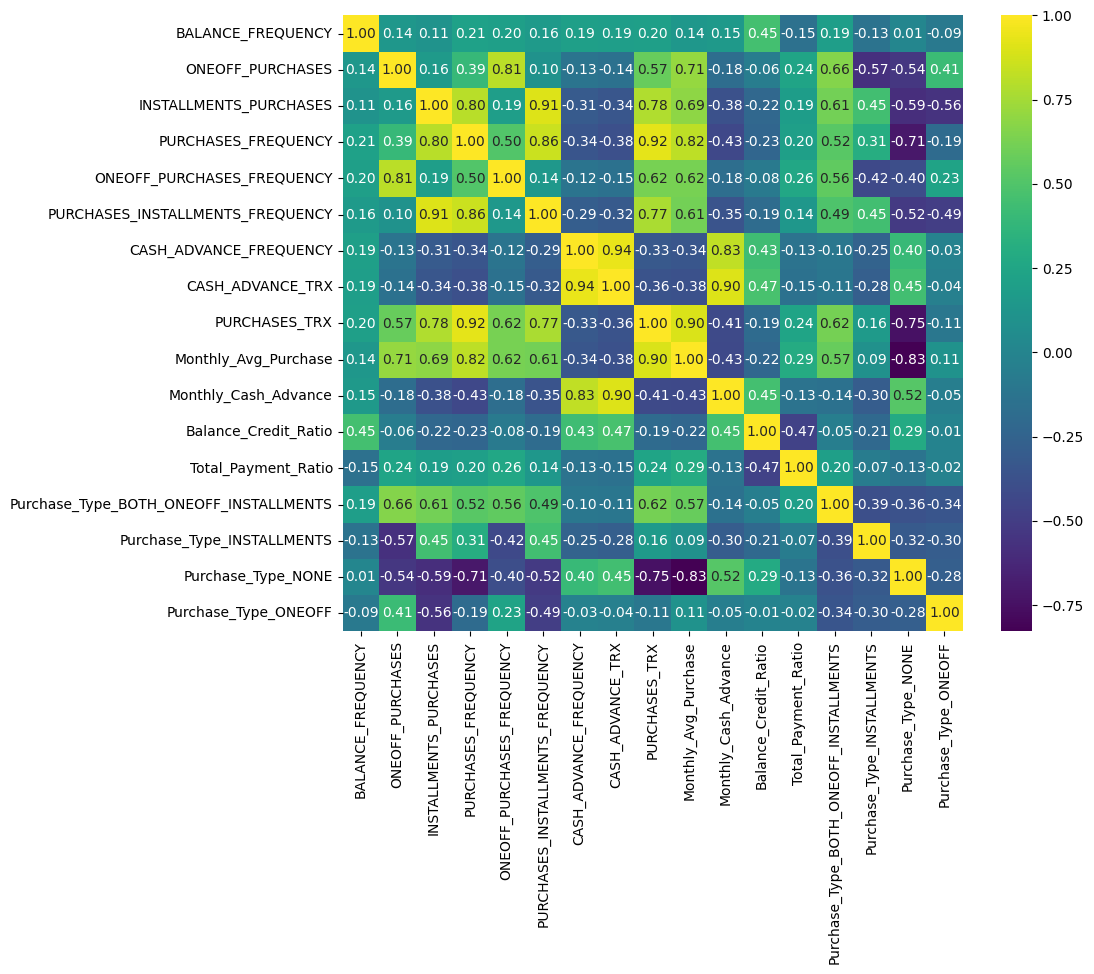

In [54]:
#creating a heatmap for better visualization
plt.figure(figsize=(10,8))
sns.heatmap(df_new.corr(),annot=True,fmt=".2f",cmap="viridis")
plt.show()

<big>
- Heat map shows that many features are co-related so applying dimension reduction wull help negating multi-colinearity in data.
</big>

- Before applying the PCA we will standardize data to avoid effect of scale on the result. Scaling will make all features with equal weight.

### Standardization of data

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
#Create an object

sc = StandardScaler()

In [57]:
df_scaled = sc.fit_transform(df_new)

In [58]:
pd.DataFrame(df_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.950000e+03,8950.000000,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03,8.950000e+03
mean,4.382342e-16,0.000000,1.034058e-16,-9.526830e-18,1.714829e-16,-1.143220e-16,6.986342e-17,-5.795488e-17,1.397268e-16,-4.922195e-17,-4.842805e-17,-6.033659e-17,1.262305e-16,4.445854e-17,-6.986342e-17,5.160366e-17,-9.526830e-17
std,1.000056e+00,1.000056,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00
min,-4.165266e+00,-0.987090,-1.087454e+00,-1.301095e+00,-7.306590e-01,-9.580617e-01,-7.224223e-01,-8.100687e-01,-1.379210e+00,-1.523368e+00,-8.906669e-01,-1.182714e+00,-1.444087e+00,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
25%,1.114241e-01,-0.987090,-1.087454e+00,-1.023803e+00,-7.306590e-01,-9.580617e-01,-7.224223e-01,-8.100687e-01,-8.746552e-01,-7.838563e-01,-8.906669e-01,-1.026036e+00,-7.557570e-01,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
50%,4.914786e-01,0.141485,3.721960e-01,1.598063e-01,-3.757081e-01,-4.012107e-01,-7.224223e-01,-8.100687e-01,1.344545e-01,2.215312e-01,-8.906669e-01,-1.346266e-01,-2.648979e-01,-6.701925e-01,-5.812208e-01,-5.436904e-01,-5.146250e-01
75%,4.914786e-01,0.972218,9.081215e-01,1.049250e+00,4.793874e-01,1.026748e+00,5.456405e-01,7.846025e-01,7.247459e-01,7.671657e-01,1.005132e+00,9.837522e-01,6.333683e-01,1.492109e+00,1.720516e+00,-5.436904e-01,-5.146250e-01
max,4.914786e-01,2.283062,2.163264e+00,1.196332e+00,2.466195e+00,1.500349e+00,5.120722e+00,3.965987e+00,2.903371e+00,2.628856e+00,2.515715e+00,1.011415e+01,7.949291e+00,1.492109e+00,1.720516e+00,1.839282e+00,1.943162e+00


### PCA

Principal Component Analysis (PCA) to determine the optimal number of components (factors) by examining the explained variance ratio. Here's a breakdown of the steps:

variance_ratio = {}: Initializes an empty dictionary to store the cumulative explained variance for different numbers of components.

for n in range(2, 18):: Loops through the range of values from 2 to 17, as you're testing PCA for different numbers of components from 2 up to 17.

pc = PCA(n_components=n): Initializes the PCA model with n components, where n is the current number in the loop.

cr_pca = pc.fit(df_scaled): Applies the PCA to the scaled data (df_scaled). This step calculates the principal components and their explained variance.

variance_ratio[n] = sum(cr_pca.explained_variance_ratio_): Calculates the cumulative explained variance for the current number of components (n). The explained_variance_ratio_ attribute of the PCA object tells you how much variance each component explains. Summing them gives the total variance explained by the n components.

In [59]:
from sklearn.decomposition import PCA

In [60]:
#applying the PCA to find the number of factors

variance_ratio = {}
for n in range(2,18):
    pc = PCA(n_components=n)
    cr_pca = pc.fit(df_scaled)
    variance_ratio[n] = sum(cr_pca.explained_variance_ratio_)


In [61]:
#ratio of variance explained 
variance_ratio

{2: 0.5824607599200575,
 3: 0.7297466434636773,
 4: 0.8113282252273151,
 5: 0.8768561357190721,
 6: 0.9184810955062329,
 7: 0.9409751162847557,
 8: 0.9615534006293798,
 9: 0.9739448843439258,
 10: 0.9835980480783891,
 11: 0.9897248725782216,
 12: 0.9927531994176728,
 13: 0.9953959123246198,
 14: 0.9979644752646765,
 15: 0.9996366026820451,
 16: 0.9999999999999999,
 17: 0.9999999999999999}

2 components explain 58.25% of the variance.
3 components explain 72.97% of the variance.
4 components explain 81.13% of the variance.
By 5 components, you explain 87.69% of the variance.
6 components explain 91.85% of the variance.
9 components explain 97.39% of the variance.
10 components explain 98.36% of the variance.
By 15 components, almost 99.96% of the variance is explained.
16 and 17 components explain nearly 100% of the variance.

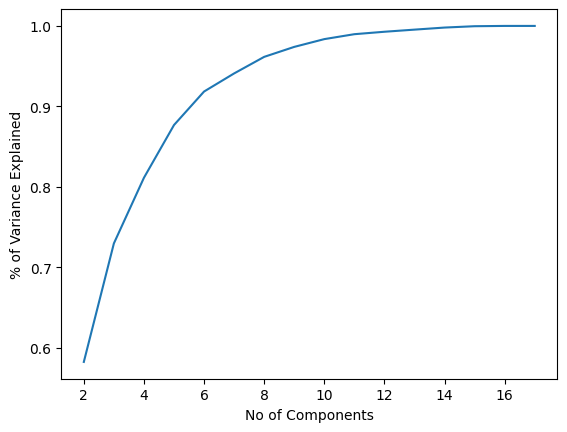

In [62]:
#plotting the graph

pd.Series(variance_ratio).plot()
plt.xlabel("No of Components")
plt.ylabel("% of Variance Explained")
plt.show()

<big>
- Since 5 Components are explaining about 88% of the variance we select 5 components
</big>

In [63]:
final_pc = PCA(n_components=5).fit(df_scaled)

reduced_df = final_pc.fit_transform(df_scaled)

The resulting reduced_df now contains the data with only the most impactful 5 principal components based on variance, suitable for further modeling or clustering. Let me know if you'd like to dive into clustering or visualize these components next!

In [64]:
#main data set has 23 components
df.shape

(8950, 23)

In [65]:
#after doing pca we got 5 components
reduced_df.shape

(8950, 5)

In [66]:
column_names = df_new.columns
column_names

Index(['BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'Monthly_Avg_Purchase',
       'Monthly_Cash_Advance', 'Balance_Credit_Ratio', 'Total_Payment_Ratio',
       'Purchase_Type_BOTH_ONEOFF_INSTALLMENTS', 'Purchase_Type_INSTALLMENTS',
       'Purchase_Type_NONE', 'Purchase_Type_ONEOFF'],
      dtype='object')

- Visualizing the reduced factors

In [67]:
pd.DataFrame(final_pc.components_.T,columns=['PC_' + str(i) for i in range(5)],index=column_names)

,PC_0,PC_1,PC_2,PC_3,PC_4
BALANCE_FREQUENCY,0.029847,-0.240297,-0.262754,-0.353524,-0.228764
ONEOFF_PURCHASES,0.214081,-0.405781,0.240049,0.001340,-0.023165
INSTALLMENTS_PURCHASES,0.312163,0.098002,-0.315571,0.087945,-0.002057
PURCHASES_FREQUENCY,0.345816,-0.016014,-0.163088,-0.074366,0.115332
ONEOFF_PURCHASES_FREQUENCY,0.214669,-0.361716,0.163291,0.036587,-0.051420
PURCHASES_INSTALLMENTS_FREQUENCY,0.295541,0.111518,-0.330038,0.023473,0.025880
CASH_ADVANCE_FREQUENCY,-0.213932,-0.286571,-0.278261,0.096093,0.360749
CASH_ADVANCE_TRX,-0.229368,-0.292065,-0.284771,0.103467,0.332620
PURCHASES_TRX,0.355594,-0.106799,-0.102334,-0.054427,0.104945
Monthly_Avg_Purchase,0.346031,-0.141640,0.024457,-0.079612,0.194129


This line of code creates a DataFrame to visualize the principal components (PCs) and their relationship to the original features. Here's what each part does:

final_pc.components_.T: Transposes the component matrix from the PCA model. Each row represents an original feature, and each column represents a principal component.
columns=['PC_' + str(i) for i in range(5)]: Names the columns as PC_0, PC_1, ..., PC_4 for each of the 5 principal components.
index=column_names: Sets the original feature names as the row index, allowing you to see how much each feature contributes to each principal component.

PC_0 has high positive loadings for features like PURCHASES_FREQUENCY, PURCHASES_TRX, and Monthly_Avg_Purchase, suggesting this component captures general purchasing behavior.
PC_1 is negatively influenced by features like ONEOFF_PURCHASES and ONEOFF_PURCHASES_FREQUENCY, possibly indicating a component focused on one-off purchase behavior.
PC_3 has a strong positive loading for Total_Payment_Ratio, indicating this component might capture payment behavior relative to spending.

In [68]:
pd.DataFrame(final_pc.explained_variance_ratio_,columns=["Variance Ratio"],index=["PC_" + str(i) for i in range(5)])

,Variance Ratio
PC_0,0.401937
PC_1,0.180524
PC_2,0.147286
PC_3,0.081582
PC_4,0.065528


#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

### Clustering
- Find the optimum number of clusters using Silhoutte Coefficient

In [69]:
from sklearn import metrics
from sklearn.cluster import KMeans

In [70]:
scores = []
inertia = []
k_range = range(3, 12)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(df_scaled)
    scores.append(metrics.silhouette_score(df_scaled, km.labels_))
    inertia.append(km.inertia_)

Silhouette Score (scores): Measures how similar a data point is to its own cluster compared to other clusters. Higher values indicate better-defined clusters, ranging from -1 to 1.
Inertia (inertia): Measures how tightly the data points are clustered around the centroids. Lower inertia values suggest more compact clusters.

In [71]:
scores

[0.31677629527868134,
 0.3883321935622073,
 0.35132935728236636,
 0.35124683060615686,
 0.3447917172088093,
 0.31867268374886104,
 0.3192021898280947,
 0.31453527980230495,
 0.3266641079573144]

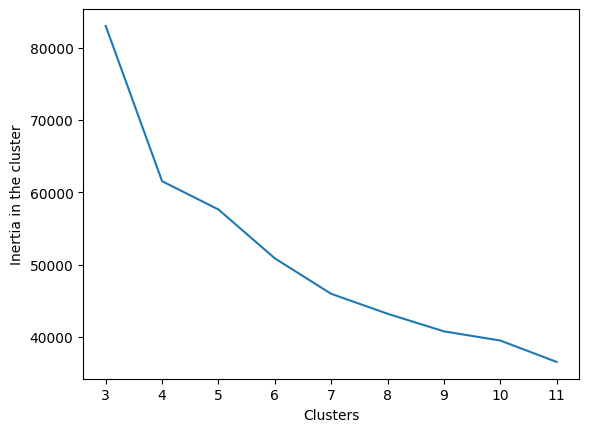

In [72]:
plt.plot(k_range,inertia)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

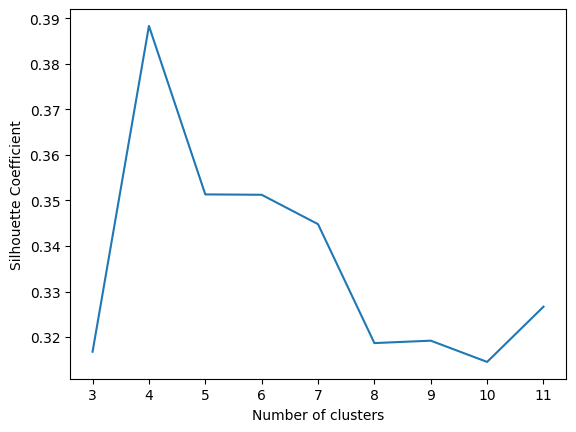

In [73]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

### Insights
- From SC Score, the number of optimal clusters could be 4 or 5

### Profiling
- To find the right clustering we will do profiling for 4, 5 clusters

### 4-Cluster Solution

In [74]:
km_4 = KMeans(n_clusters=4,random_state=123)

In [75]:
#fitting the Kmeans 
km_4.fit(reduced_df)
km_4.labels_

array([0, 1, 3, ..., 0, 1, 3])

In [76]:
#proportion of labels classified

pd.Series(km_4.labels_).value_counts()

2    2758
0    2229
1    2089
3    1874
Name: count, dtype: int64

<big>
Plotting the 4 cluster Solution labels    
</big>

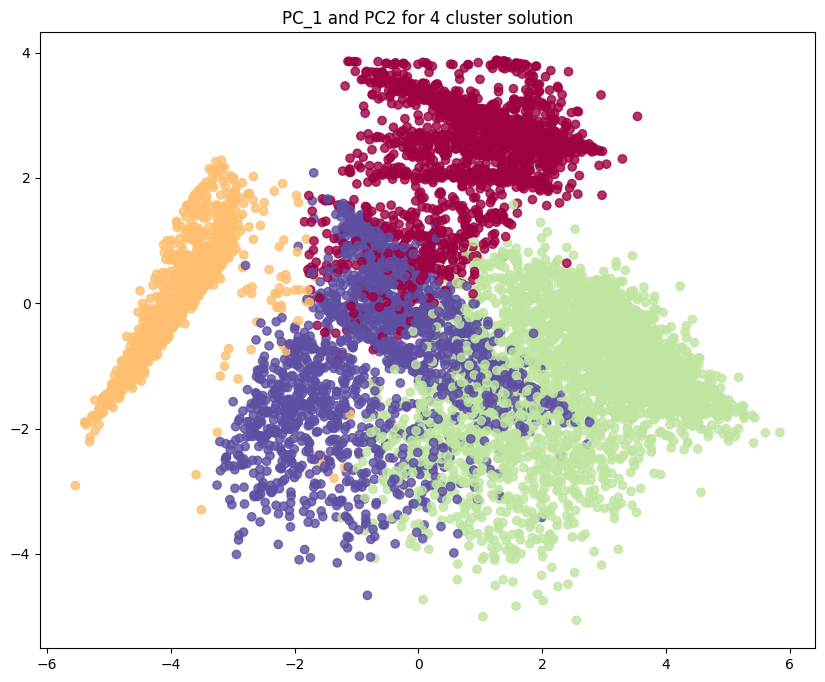

In [77]:
plt.figure(figsize=(10, 8 ))
plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c = km_4.labels_, cmap = "Spectral", alpha = 0.8)
plt.title("PC_1 and PC2 for 4 cluster solution")
plt.show()

<big> 
    Taking the key performance index variables for analysis
</big>

In [78]:
col_key_kpi = ["PURCHASES_TRX","Monthly_Avg_Purchase","Monthly_Cash_Advance","Balance_Credit_Ratio","CASH_ADVANCE_TRX","Total_Payment_Ratio","Purchase_Type_INSTALLMENTS","Purchase_Type_NONE","Purchase_Type_BOTH_ONEOFF_INSTALLMENTS","Purchase_Type_ONEOFF","CREDIT_LIMIT"]

In [79]:
#making a dataframe with 4 cluster solution labels

cluster_df_4 = pd.concat([df_org[col_key_kpi], pd.Series(km_4.labels_,name="Cluster_4")], axis =1)

In [80]:
cluster_df_4.head()

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT,Cluster_4
0,2,7.95,0.00,0.04,0,1.45,True,False,False,False,1000.0,0
1,0,0.00,536.91,0.46,4,3.83,False,True,False,False,7000.0,1
2,12,64.43,0.00,0.33,0,0.99,False,False,False,True,7500.0,3
3,1,124.92,17.15,0.22,1,0.00,False,False,False,True,7500.0,3
4,1,1.33,0.00,0.68,0,2.77,False,False,False,True,1200.0,3


#### Grouping the data based on cluster.

#### Mean gives a good indication of the distribution of data. so we are finding the mean for each variable for each cluster 


In [81]:
cluster_4 = cluster_df_4.groupby('Cluster_4').apply(lambda x: x[col_key_kpi].mean()).T
cluster_4

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_24964\3819767385.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cluster_4 = cluster_df_4.groupby('Cluster_4').apply(lambda x: x[col_key_kpi].mean()).T


Cluster_4,0,1,2,3
PURCHASES_TRX,12.049349,0.044998,33.125453,7.118997
Monthly_Avg_Purchase,47.553876,0.157688,193.696041,69.758170
Monthly_Cash_Advance,33.481377,186.380235,67.620018,77.843474
Balance_Credit_Ratio,0.264459,0.576103,0.354572,0.378629
CASH_ADVANCE_TRX,1.020637,6.553854,2.807107,2.864995
Total_Payment_Ratio,13.397622,9.931565,7.268709,5.561393
Purchase_Type_INSTALLMENTS,0.998205,0.016754,0.000000,0.000000
Purchase_Type_NONE,0.000000,0.977501,0.000000,0.000000
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,0.001795,0.002393,1.000000,0.003735
Purchase_Type_ONEOFF,0.000000,0.003351,0.000000,0.996265


In [82]:
def ClusterPercentage(datafr,name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(datafr[name].value_counts().sort_index())
    percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [83]:
ClusterPercentage(cluster_df_4,"Cluster_4")

,Cluster_Size,Cluster_Percentage
Cluster_4,,
0,2229,24.91
1,2089,23.34
2,2758,30.82
3,1874,20.94


In [84]:
#transposing the cluster
cluster_4_T = cluster_4.T

In [85]:
cluster_4_T

,PURCHASES_TRX,Monthly_Avg_Purchase,Monthly_Cash_Advance,Balance_Credit_Ratio,CASH_ADVANCE_TRX,Total_Payment_Ratio,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_ONEOFF,CREDIT_LIMIT
Cluster_4,,,,,,,,,,,
0,12.049349,47.553876,33.481377,0.264459,1.020637,13.397622,0.998205,0.000000,0.001795,0.000000,3334.739067
1,0.044998,0.157688,186.380235,0.576103,6.553854,9.931565,0.016754,0.977501,0.002393,0.003351,4056.949100
2,33.125453,193.696041,67.620018,0.354572,2.807107,7.268709,0.000000,0.000000,1.000000,0.000000,5750.015566
3,7.118997,69.758170,77.843474,0.378629,2.864995,5.561393,0.000000,0.000000,0.003735,0.996265,4512.905630


In [86]:
def ClusterAnalysis(datafr):
    """A function to analyze the KPI variables across each segment in the cluster and returns dataframe useful for plotting"""
    
    #Build a dataframe of KPI for each cluster suitable for plotting
    n = datafr.shape[0]
    
    mn_cash_advnce = pd.Series(np.log(datafr.reset_index(drop = True)["Monthly_Cash_Advance"]))
    balance_crdt_ratio = pd.Series(datafr.reset_index(drop = True)["Balance_Credit_Ratio"])
    mn_avg_purchases = pd.Series(np.log(datafr.reset_index(drop = True)["Monthly_Avg_Purchase"]))
    total_pymnt_ratio = pd.Series(datafr.reset_index(drop = True)["Total_Payment_Ratio"])
    installment = pd.Series(datafr.reset_index(drop = True)["Purchase_Type_INSTALLMENTS"])
    oneoff = pd.Series(datafr.reset_index(drop = True)["Purchase_Type_ONEOFF"])

    final_df = pd.concat([mn_cash_advnce,mn_avg_purchases,balance_crdt_ratio,total_pymnt_ratio,installment,oneoff],axis=1)
    final_df.columns=["Monthly_Cash_Advance","Monthly_Avg_Purchase","Balance_Credit_Ratio","Total_Payment_Ratio","Installments","Oneoff"]
    final_df.index = ["Cl-"+ str(i) for i in range(n)]
    return(final_df)
    

In [87]:
final_df_4 = ClusterAnalysis(cluster_4_T)
final_df_4

,Monthly_Cash_Advance,Monthly_Avg_Purchase,Balance_Credit_Ratio,Total_Payment_Ratio,Installments,Oneoff
Cl-0,3.510989,3.861863,0.264459,13.397622,0.998205,0.000000
Cl-1,5.227789,-1.847138,0.576103,9.931565,0.016754,0.003351
Cl-2,4.213904,5.266290,0.354572,7.268709,0.000000,0.000000
Cl-3,4.354700,4.245035,0.378629,5.561393,0.000000,0.996265


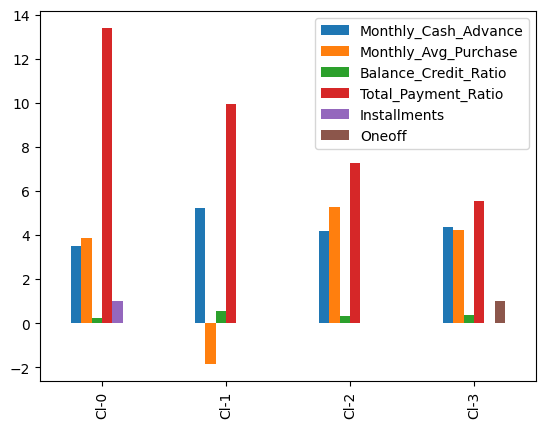

In [88]:
final_df_4.plot(kind = "bar")
#plt.xticks(["11","22","33","44"])
plt.show()

### Insights with 4 Clusters
----
<big>
- Cluster 0 is the group of customers who have the highest Montly Average Purchases and doing both installment and one off purchases. **This group is about 31% of the total customer base**
- Cluster 1 customers are doing  maximum one off payments and least total payment ratio. **This group is about 21% of the total customer base**
- Cluster 2 customers have lowest balance to credit ratio (good credit score) and are paying dues also doing maximum installment purchases. **This group is about 25% of the total customer base**
- Cluster 3 customers are taking maximum advance cash and has high debt to credit ratio (poor credit rating) & not doing any purchase transcation.**This group is about 23% of the total customer base**

----

## Marketing Strategy Suggested Cluster 4
---

###  Group 0
   - This is performing best among all the clusters are maintaining highest monthly average purchases. Giving any reward points might increase their purchases.
   
### Group 1
   - This group is doing maximum oneoff payments(may be for bills only). Customers of this group can be offered discount/offer on next transactions upon full payment.
   
### Group 2 
   - They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. Promote premium cards/loyality cars to increase transcations.
   
### Group 3
   - These customers are taking maximum cash advance, these customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.

In [89]:
# Define the exact columns used during fitting
training_columns = [
    'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 
    'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 
    'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
    'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 
    'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 
    'TENURE', 'Monthly_Avg_Purchase', 'Monthly_Cash_Advance', 
    'Balance_Credit_Ratio', 'Total_Payment_Ratio', 
    'Purchase_Type_BOTH_ONEOFF_INSTALLMENTS', 'Purchase_Type_INSTALLMENTS', 
    'Purchase_Type_NONE', 'Purchase_Type_ONEOFF'
]

# Create a sample input with all columns
sample_input = pd.DataFrame({
    'BALANCE': [5000], 
    'BALANCE_FREQUENCY': [0.5], 
    'PURCHASES': [1000],
    'ONEOFF_PURCHASES': [200],
    'INSTALLMENTS_PURCHASES': [300],
    'CASH_ADVANCE': [150],
    'PURCHASES_FREQUENCY': [0.1],
    'ONEOFF_PURCHASES_FREQUENCY': [0.05],
    'PURCHASES_INSTALLMENTS_FREQUENCY': [0.3],
    'CASH_ADVANCE_FREQUENCY': [0.2],
    'CASH_ADVANCE_TRX': [3],
    'PURCHASES_TRX': [10],
    'CREDIT_LIMIT': [25000],
    'PAYMENTS': [2000],
    'MINIMUM_PAYMENTS': [1500],
    'PRC_FULL_PAYMENT': [0.5],
    'TENURE': [5],
    'Monthly_Avg_Purchase': [150],
    'Monthly_Cash_Advance': [50],
    'Balance_Credit_Ratio': [0.2],
    'Total_Payment_Ratio': [0.3],
    'Purchase_Type_BOTH_ONEOFF_INSTALLMENTS': [0],
    'Purchase_Type_INSTALLMENTS': [1],
    'Purchase_Type_NONE': [0],
    'Purchase_Type_ONEOFF': [0]
})

# Ensure the columns are in the same order as the training data
sample_input = sample_input[training_columns]

# Now, call the prediction function with the correctly formatted input
predicted_cluster = kn_4_cluster(sample_input)
print(f"The predicted cluster for the input data is: {predicted_cluster}")


NameError: name 'kn_4_cluster' is not defined

In [91]:
#C10050,229.867179,1,2390.6,1402.93,987.67,0,1,0.666667,1,0,0,87,3300,2543.953559,175.657825,0.916667,12

# Data
input_data = {
    'CUST_ID': ['C10050'],
    'BALANCE': [229.867179],
    'BALANCE_FREQUENCY': [1],
    'PURCHASES': [2390.6],
    'ONEOFF_PURCHASES': [1402.93],
    'INSTALLMENTS_PURCHASES': [987.67],
    'CASH_ADVANCE': [0],
    'PURCHASES_FREQUENCY': [1],
    'ONEOFF_PURCHASES_FREQUENCY': [0.666667],
    'PURCHASES_INSTALLMENTS_FREQUENCY': [1],
    'CASH_ADVANCE_FREQUENCY': [0],
    'CASH_ADVANCE_TRX': [0],
    'PURCHASES_TRX': [87],
    'CREDIT_LIMIT': [3300],
    'PAYMENTS': [2543.953559],
    'MINIMUM_PAYMENTS': [175.657825],
    'PRC_FULL_PAYMENT': [0.916667],
    'TENURE': [12]
}

# Create DataFrame
input_df = pd.DataFrame(input_data)

# Display the DataFrame
print(input_df)


  CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10050  229.867179                  1     2390.6           1402.93   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  987.67             0                    1   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.666667                                 1   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                       0                 0             87          3300   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  2543.953559        175.657825          0.916667      12  


In [92]:
input_df["Monthly_Avg_Purchase"] = input_df["PURCHASES"] / input_df["TENURE"]
input_df["Monthly_Cash_Advance"] = input_df["CASH_ADVANCE"] / input_df["TENURE"]
input_df["Purchase_Type"] = input_df.apply(purchasetype, axis=1)
input_df["Balance_Credit_Ratio"] = input_df["BALANCE"] / input_df["CREDIT_LIMIT"]
import numpy as np

input_df["Total_Payment_Ratio"] = np.where(input_df["MINIMUM_PAYMENTS"] == 0,
                                            input_df["MINIMUM_PAYMENTS"], 
                                            input_df["PAYMENTS"] / input_df["MINIMUM_PAYMENTS"])


In [93]:
input_df.shape

(1, 23)

In [94]:
input_df = input_df.round(2)
input_df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Monthly_Avg_Purchase,Monthly_Cash_Advance,Purchase_Type,Balance_Credit_Ratio,Total_Payment_Ratio
0,C10050,229.87,1,2390.6,1402.93,987.67,0,1,0.67,1,...,3300,2543.95,175.66,0.92,12,199.22,0.0,BOTH_ONEOFF_INSTALLMENTS,0.07,14.48


In [95]:
input_numeric_data = input_df._get_numeric_data()
input_numeric_data.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE', 'Monthly_Avg_Purchase', 'Monthly_Cash_Advance',
       'Balance_Credit_Ratio', 'Total_Payment_Ratio'],
      dtype='object')

In [96]:
input_df_log = input_numeric_data.apply(lambda x: np.log(x + 1))


In [97]:
input_categorical_variable_names = [x for x in list(input_df.columns) if x not in input_numeric_data.columns]
input_categorical_variable_names

['CUST_ID', 'Purchase_Type']

In [98]:
input_categorical_variable_names.remove("CUST_ID")
input_categorical_variable_names

['Purchase_Type']

In [106]:
# Create dummies for the single input
input_df_dummies = pd.get_dummies(input_df[input_categorical_variable_names])

# Align the columns to match the full dataset's columns
input_df_dummies = input_df_dummies.reindex(columns=dummies.columns, fill_value=False)

# Convert the columns to boolean (True/False) based on the category values
input_df_dummies = input_df_dummies.astype(bool)

In [107]:
input_df_dummies

,Purchase_Type_BOTH_ONEOFF_INSTALLMENTS,Purchase_Type_INSTALLMENTS,Purchase_Type_NONE,Purchase_Type_ONEOFF
0,True,False,False,False


In [108]:
input_df_merged = pd.concat([input_df_log, input_df_dummies], axis=1)


In [109]:
var_names = ["BALANCE", "PURCHASES", "PAYMENTS", "MINIMUM_PAYMENTS", "PRC_FULL_PAYMENT", "TENURE", "CASH_ADVANCE", "CREDIT_LIMIT"]

# Step 7: Create a new DataFrame by excluding the KPI-related variables
input_df_new = input_df_merged[[x for x in input_df_merged.columns if x not in var_names]]

In [110]:
input_df_new.dtypes

BALANCE_FREQUENCY                         float64
ONEOFF_PURCHASES                          float64
INSTALLMENTS_PURCHASES                    float64
PURCHASES_FREQUENCY                       float64
ONEOFF_PURCHASES_FREQUENCY                float64
PURCHASES_INSTALLMENTS_FREQUENCY          float64
CASH_ADVANCE_FREQUENCY                    float64
CASH_ADVANCE_TRX                          float64
PURCHASES_TRX                             float64
Monthly_Avg_Purchase                      float64
Monthly_Cash_Advance                      float64
Balance_Credit_Ratio                      float64
Total_Payment_Ratio                       float64
Purchase_Type_BOTH_ONEOFF_INSTALLMENTS       bool
Purchase_Type_INSTALLMENTS                   bool
Purchase_Type_NONE                           bool
Purchase_Type_ONEOFF                         bool
dtype: object

In [111]:
# Apply the same scaling transformation to input_df_new
input_scaled = sc.transform(input_df_new)


In [113]:
print(input_scaled.shape)


(1, 17)


In [117]:
input_scaled_repeated = np.tile(input_scaled, (5, 1))

In [118]:
# Fit the PCA on input_scaled
final_pc_input = PCA(n_components=5)

# Transform the input_scaled data using the fitted PCA
reduced_input_df = final_pc_input.fit_transform(input_scaled_repeated)


In [119]:
reduced_input_df.shape

(5, 5)

In [123]:
ans=km_4.predict(reduced_input_df)
ans

array([1, 0, 0, 0, 0])

In [127]:
def get_input_from_user():
    # Prompt user for input data
    cust_id = input("Enter Customer ID: ")
    balance = float(input("Enter Balance: "))
    balance_frequency = float(input("Enter Balance Frequency: "))
    purchases = float(input("Enter Purchases: "))
    oneoff_purchases = float(input("Enter Oneoff Purchases: "))
    installments_purchases = float(input("Enter Installments Purchases: "))
    cash_advance = float(input("Enter Cash Advance: "))
    purchases_frequency = float(input("Enter Purchases Frequency: "))
    oneoff_purchases_frequency = float(input("Enter Oneoff Purchases Frequency: "))
    purchases_installments_frequency = float(input("Enter Purchases Installments Frequency: "))
    cash_advance_frequency = float(input("Enter Cash Advance Frequency: "))
    cash_advance_trx = int(input("Enter Cash Advance Transactions: "))
    purchases_trx = int(input("Enter Purchases Transactions: "))
    credit_limit = float(input("Enter Credit Limit: "))
    payments = float(input("Enter Payments: "))
    minimum_payments = float(input("Enter Minimum Payments: "))
    prc_full_payment = float(input("Enter Percentage Full Payment: "))
    tenure = int(input("Enter Tenure (in months): "))
    
    input_data = {
        'CUST_ID': [cust_id],
        'BALANCE': [balance],
        'BALANCE_FREQUENCY': [balance_frequency],
        'PURCHASES': [purchases],
        'ONEOFF_PURCHASES': [oneoff_purchases],
        'INSTALLMENTS_PURCHASES': [installments_purchases],
        'CASH_ADVANCE': [cash_advance],
        'PURCHASES_FREQUENCY': [purchases_frequency],
        'ONEOFF_PURCHASES_FREQUENCY': [oneoff_purchases_frequency],
        'PURCHASES_INSTALLMENTS_FREQUENCY': [purchases_installments_frequency],
        'CASH_ADVANCE_FREQUENCY': [cash_advance_frequency],
        'CASH_ADVANCE_TRX': [cash_advance_trx],
        'PURCHASES_TRX': [purchases_trx],
        'CREDIT_LIMIT': [credit_limit],
        'PAYMENTS': [payments],
        'MINIMUM_PAYMENTS': [minimum_payments],
        'PRC_FULL_PAYMENT': [prc_full_payment],
        'TENURE': [tenure]
    }
    
    return pd.DataFrame(input_data)

def purchasetype(row):
    if row["INSTALLMENTS_PURCHASES"] > 0:
        return "Installment"
    elif row["ONEOFF_PURCHASES"] > 0:
        return "OneOff"
    else:
        return "None"

def process_input_for_cluster(input_df, sc, final_pc_input, dummies_columns):
    """
    Process input data for clustering
    
    Parameters:
    input_df: DataFrame with raw input
    sc: Fitted StandardScaler object
    final_pc_input: Fitted PCA object
    dummies_columns: List of dummy columns from training data
    """
    # Feature Engineering
    input_df["Monthly_Avg_Purchase"] = input_df["PURCHASES"] / input_df["TENURE"]
    input_df["Monthly_Cash_Advance"] = input_df["CASH_ADVANCE"] / input_df["TENURE"]
    input_df["Purchase_Type"] = input_df.apply(purchasetype, axis=1)
    input_df["Balance_Credit_Ratio"] = input_df["BALANCE"] / input_df["CREDIT_LIMIT"]
    
    # Total Payment Ratio calculation
    input_df["Total_Payment_Ratio"] = np.where(
        input_df["MINIMUM_PAYMENTS"] == 0,
        input_df["MINIMUM_PAYMENTS"],
        input_df["PAYMENTS"] / input_df["MINIMUM_PAYMENTS"]
    )
    
    # Round values
    input_df = input_df.round(2)
    
    # Log transformation of numeric data
    input_numeric_data = input_df._get_numeric_data()
    input_df_log = input_numeric_data.apply(lambda x: np.log(x + 1))
    
    # Get categorical columns (excluding CUST_ID)
    input_categorical_variable_names = [x for x in list(input_df.columns) 
                                      if x not in input_numeric_data.columns 
                                      and x != "CUST_ID"]
    
    # Create and align dummy variables
    input_df_dummies = pd.get_dummies(input_df[input_categorical_variable_names])
    input_df_dummies = input_df_dummies.reindex(columns=dummies_columns, fill_value=False)
    input_df_dummies = input_df_dummies.astype(bool)
    
    # Merge numeric and categorical data
    input_df_merged = pd.concat([input_df_log, input_df_dummies], axis=1)
    
    # Exclude KPI variables
    var_names = ["BALANCE", "PURCHASES", "PAYMENTS", "MINIMUM_PAYMENTS", 
                 "PRC_FULL_PAYMENT", "TENURE", "CASH_ADVANCE", "CREDIT_LIMIT"]
    input_df_new = input_df_merged[[x for x in input_df_merged.columns if x not in var_names]]
    
    # Scale the data
    input_scaled = sc.transform(input_df_new)
    input_scaled_repeated = np.tile(input_scaled, (5, 1))
    
    # Apply PCA transformation
    reduced_input_df = final_pc_input.transform(input_scaled_repeated)
    
    return reduced_input_df

def predict_cluster(input_df, km_model, sc, final_pc_input, dummies_columns):
    """
    Predict cluster for input data
    
    Parameters:
    input_df: DataFrame with raw input
    km_model: Fitted KMeans model
    sc: Fitted StandardScaler object
    final_pc_input: Fitted PCA object
    dummies_columns: List of dummy columns from training data
    """
    # Process the input data
    input_df_cleaned = process_input_for_cluster(
        input_df, 
        sc=sc, 
        final_pc_input=final_pc_input,
        dummies_columns=dummies_columns
    )
    
    # Predict clusters
    predictions = km_model.predict(input_df_cleaned)
    
    # Return most frequent cluster
    most_repeated_cluster = stats.mode(predictions)[0][0]
    return most_repeated_cluster

def main(sc, final_pc_input, km_model, dummies_columns):
    """
    Main function to run the clustering pipeline
    
    Parameters:
    sc: Fitted StandardScaler object
    final_pc_input: Fitted PCA object
    km_model: Fitted KMeans model
    dummies_columns: List of dummy columns from training data
    """
    # Get user input
    input_df = get_input_from_user()
    
    # Predict cluster
    cluster = predict_cluster(
        input_df, 
        km_model=km_4,
        sc=sc, 
        final_pc_input=final_pc_input,
        dummies_columns=dummies_columns
    )
    
    print(f"The predicted cluster number is: {cluster}")
    return cluster

In [134]:
def process_credit_data(input_data):
    """
    Process credit card data and predict cluster.
    
    Parameters:
    input_data (dict): Dictionary containing credit card features.
    
    Returns:
    predictions: Predicted cluster labels.
    """
    
    # Create DataFrame from input data
    input_df = pd.DataFrame(input_data)
    
    # Feature Engineering
    input_df["Monthly_Avg_Purchase"] = input_df["PURCHASES"] / input_df["TENURE"]
    input_df["Monthly_Cash_Advance"] = input_df["CASH_ADVANCE"] / input_df["TENURE"]
    input_df["Purchase_Type"] = input_df.apply(purchasetype, axis=1)
    input_df["Balance_Credit_Ratio"] = input_df["BALANCE"] / input_df["CREDIT_LIMIT"]
    
    # Total Payment Ratio
    input_df["Total_Payment_Ratio"] = np.where(input_df["MINIMUM_PAYMENTS"] == 0,
                                            input_df["MINIMUM_PAYMENTS"],
                                            input_df["PAYMENTS"] / input_df["MINIMUM_PAYMENTS"])
    
    # Round values for precision
    input_df = input_df.round(2)
    
    # Apply log transformation to numeric data
    input_numeric_data = input_df._get_numeric_data()
    input_df_log = input_numeric_data.apply(lambda x: np.log(x + 1))
    
    # Identify categorical variables
    input_categorical_variable_names = [x for x in list(input_df.columns) if x not in input_numeric_data.columns]
    input_categorical_variable_names.remove("CUST_ID")
    
    # Create dummy variables for categorical columns
    input_df_dummies = pd.get_dummies(input_df[input_categorical_variable_names])
    
    # Ensure that the columns in the new data match those used during training
    # Assume `dummies` is already defined as the columns from training data
    input_df_dummies = input_df_dummies.reindex(columns=dummies.columns, fill_value=0)
    
    # Convert to boolean (True/False) for categorical columns
    input_df_dummies = input_df_dummies.astype(bool)
    
    # Merge log-transformed numeric data with dummies
    input_df_merged = pd.concat([input_df_log, input_df_dummies], axis=1)
    
    # Remove certain variables not needed for clustering
    var_names = ["BALANCE", "PURCHASES", "PAYMENTS", "MINIMUM_PAYMENTS", 
                 "PRC_FULL_PAYMENT", "TENURE", "CASH_ADVANCE", "CREDIT_LIMIT"]
    
    # Select relevant columns for clustering
    input_df_new = input_df_merged[[x for x in input_df_merged.columns if x not in var_names]]
    
    # Standardize the data using a pre-fitted scaler (assuming `sc` is already defined)
    input_scaled = sc.transform(input_df_new)
    
    # Repeat the scaled data for PCA transformation
    input_scaled_repeated = np.tile(input_scaled, (5, 1))
    
    # Apply PCA transformation (using `final_pc_input` pre-fitted PCA object)
    reduced_input_df = final_pc_input.transform(input_scaled_repeated)
    
    # Predict clusters using KMeans (assuming `km_4` is already defined)
    predictions = km_4.predict(reduced_input_df)
    
    return predictions


In [142]:
from scipy import stats

# Create input data dictionary for a single customer
input_data = {
    'CUST_ID': ['C10001'],
    'BALANCE': [40.900749],
    'BALANCE_FREQUENCY': [0.818182],
    'PURCHASES': [95.4],
    'ONEOFF_PURCHASES': [0],
    'INSTALLMENTS_PURCHASES': [95.4],
    'CASH_ADVANCE': [0],
    'PURCHASES_FREQUENCY': [0.166667],
    'ONEOFF_PURCHASES_FREQUENCY': [0],
    'PURCHASES_INSTALLMENTS_FREQUENCY': [0.083333],
    'CASH_ADVANCE_FREQUENCY': [0],
    'CASH_ADVANCE_TRX': [0],
    'PURCHASES_TRX': [2],
    'CREDIT_LIMIT': [1000],
    'PAYMENTS': [201.802084],
    'MINIMUM_PAYMENTS': [139.509787],
    'PRC_FULL_PAYMENT': [0],
    'TENURE': [12]
}

# Process the data and get prediction
result = process_credit_data(input_data)

# Get the most frequent cluster (handling the result properly)
final_cluster = result[0]

# Print result
print(f"Customer {input_data['CUST_ID'][0]} belongs to cluster {final_cluster}")

# Create DataFrame with single result
result_df = pd.DataFrame({
    'CUST_ID': input_data['CUST_ID'],
    'Predicted_Cluster': [final_cluster]
})

print("\nResult DataFrame:")
print(result_df)

Customer C10001 belongs to cluster 1

Result DataFrame:
  CUST_ID  Predicted_Cluster
0  C10001                  1


In [144]:
import pickle

# Save the scaler model as 'scaler_cluster.pkl'
with open('scaler_cluster.pkl', 'wb') as f:
    pickle.dump(sc, f)

# Save the PCA model as 'pca_cluster.pkl'
with open('pca_cluster.pkl', 'wb') as f:
    pickle.dump(final_pc, f)

# Save the KMeans model as 'kmeans_cluster.pkl'
with open('kmeans_cluster.pkl', 'wb') as f:
    pickle.dump(km_4, f)
